# Banglore house price pridiction tried to build myself

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib

## Load data

In [2]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df["society"].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [5]:
df["size"].value_counts

<bound method IndexOpsMixin.value_counts of 0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13320, dtype: object>

In [6]:
df = df.drop("society", axis='columns')
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [7]:
df.shape

(13320, 8)

In [8]:
df = df.drop(["area_type","availability"],axis = "columns")

In [9]:
df.shape

(13320, 6)

# handling missing values

In [10]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [11]:
df["balcony"].fillna(int(df["balcony"].mean()), inplace=True)
print(int(df["balcony"].mean()))

1


In [12]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

In [13]:
df = df.dropna()
df.shape

(13246, 6)

In [14]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

# feature engineering

In [15]:
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [16]:
df["bhk"] = df["size"].apply(lambda x: int(x.split(" ")[0]) )
df = df.drop("size", axis='columns')
df.head()


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [17]:
# df.total_sqft = pd.to_numeric(df.total_sqft, errors='ignore')

In [18]:
df.loc[30]

location        Yelahanka
total_sqft    2100 - 2850
bath                  4.0
balcony               0.0
price               186.0
bhk                     4
Name: 30, dtype: object

In [19]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
df.total_sqft = df.total_sqft.apply(convert_sqft_to_num)

In [21]:
df.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
for i in df.total_sqft:
    if type(i) != float:
        print(type(i))
    else:
        pass
print("all success")
df.head(5)

all success


,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


# Feature Engineering 

### adding new new feature "price per square feet", which will be equal to total_sqft/price

In [23]:
df["price_per_sqft"] = df.price*100000/df.total_sqft


In [24]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [25]:
df_location = df.location.value_counts(ascending=False)
df_location


Whitefield                   534
Sarjapur  Road               392
Electronic City              302
Kanakpura Road               266
Thanisandra                  233
                            ... 
Jeevanhalli                    1
Sathanur                       1
banashankari stage iii sa      1
P Krishnappa Layout            1
Shivanagar                     1
Name: location, Length: 1304, dtype: int64

In [26]:
df_location.values.sum()

13246

In [27]:
df_loc_new = df_location[df_location>10]
len(df_loc_new)

241

In [28]:
len(df_location)


1304

In [29]:
df_loc_other = df_location[df_location<=10]
df_loc_other

Dodsworth Layout             10
Nagadevanahalli              10
Ganga Nagar                  10
Sadashiva Nagar              10
1st Block Koramangala        10
                             ..
Jeevanhalli                   1
Sathanur                      1
banashankari stage iii sa     1
P Krishnappa Layout           1
Shivanagar                    1
Name: location, Length: 1063, dtype: int64

# Dimentionality Reduction 

In [30]:
location_less_than_10 = df_location[df_location<=10]
location_less_than_10

Dodsworth Layout             10
Nagadevanahalli              10
Ganga Nagar                  10
Sadashiva Nagar              10
1st Block Koramangala        10
                             ..
Jeevanhalli                   1
Sathanur                      1
banashankari stage iii sa     1
P Krishnappa Layout           1
Shivanagar                    1
Name: location, Length: 1063, dtype: int64

In [31]:
df.location =  df.location.apply(lambda x: "other" if x in location_less_than_10 else x)
df.location.value_counts()


other                 2896
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
                      ... 
Pattandur Agrahara      11
Kodigehalli             11
Narayanapura            11
LB Shastri Nagar        11
Thyagaraja Nagar        11
Name: location, Length: 242, dtype: int64

In [32]:
len(df.location.unique())

242

In [33]:
df.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [34]:
# df2 = df[~(df.total_sqft/df.bhk<300)]

In [35]:
# df2.price_per_sqft.describe()

### Outlier Removal using Standard deviation and mean

In [36]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for location,subdf in df.groupby("location"):
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >(mean-std)) & (subdf.price_per_sqft < (mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df = remove_pps_outliers(df)
df.shape

(11434, 7)

In [37]:
df.price_per_sqft.describe()

count    11434.000000
mean      6306.829436
std       3641.845419
min        267.829813
25%       4285.714286
50%       5311.170467
75%       6850.736417
max      53150.000000
Name: price_per_sqft, dtype: float64

### Now lets check for a given location how 2bhk and 3 bhk price look like

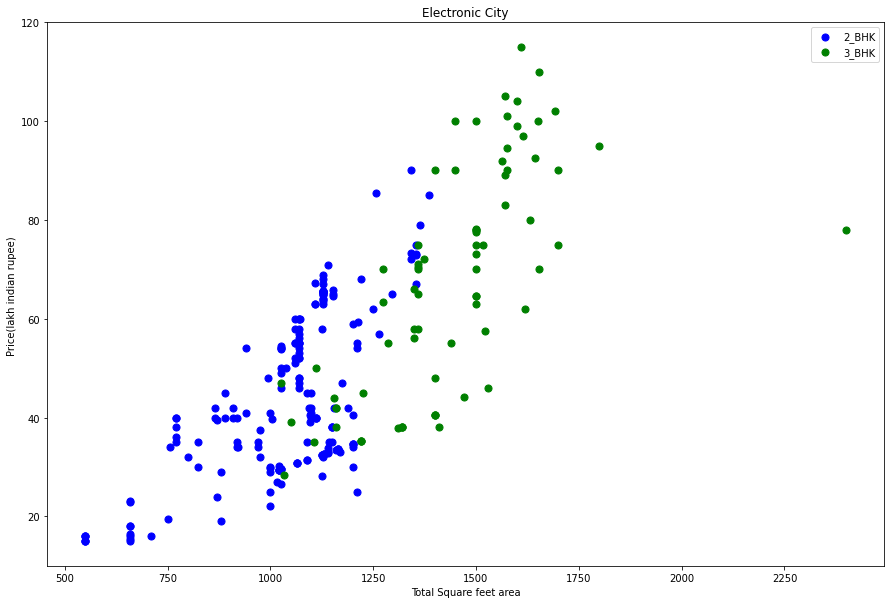

In [39]:
def plot_scatter_chart(df,locat):
    df_2bhk = df[(df.location==locat) & (df.bhk==2)]
    df_3bhk = df[(df.location==locat) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(df_2bhk.total_sqft,df_2bhk.price,color='blue',label='2_BHK',s=50)
    plt.scatter(df_3bhk.total_sqft,df_3bhk.price,color='green',label='3_BHK',s=50)
    plt.xlabel("Total Square feet area")
    plt.ylabel("Price(lakh indian rupee) ")
    plt.title(locat)
    plt.legend()
    
plot_scatter_chart(df,"Electronic City")